In [4]:
from pathlib import Path
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# =========================================
# Constants 
# =========================================
FS = 200  # Sampling rate in Hz
CANONICAL_CHANNELS = ['T7', 'F8', 'Cz', 'P4']  # EEG channels
SCALE_FACTOR = 15686 / 8388607  # µV per LSB (Ganglion ADC)

# =========================================
# Paths to data
# =========================================
raw_dir = Path("data/auditory-evoked-potential-eeg-biometric-dataset-1.0.0/Raw_Data")  # Raw EEG Signal
trim_file = Path("data/auditory-evoked-potential-eeg-biometric-dataset-1.0.0/data_trim.csv")  # Trim points
filtered_dir = Path("data/auditory-evoked-potential-eeg-biometric-dataset-1.0.0/Filtered_Data")  # Reference data


In [6]:
eeg = np.loadtxt(filtered_dir / "s01_ex01_s01.csv", delimiter=",", skiprows=1, usecols=range(1, 5)) * SCALE_FACTOR
print(eeg.shape)  # (n_samples, 4)


(24000, 4)


In [7]:
fs = 200  # example (Hz)
n_samples = eeg.shape[0]

time = np.arange(n_samples) / fs


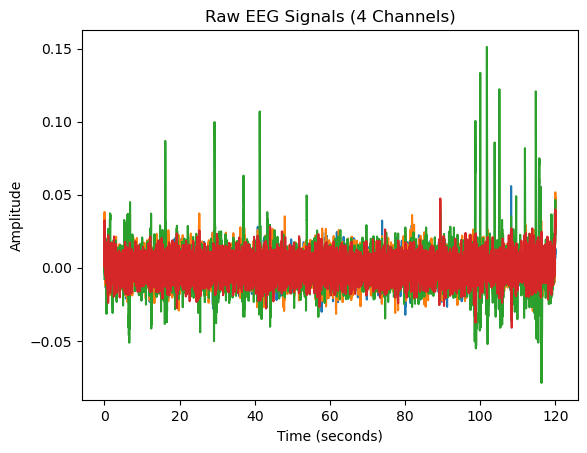

In [8]:
import matplotlib.pyplot as plt

plt.figure()
for ch in range(4):
    plt.plot(time, eeg[:, ch])

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Raw EEG Signals (4 Channels)")
plt.show()


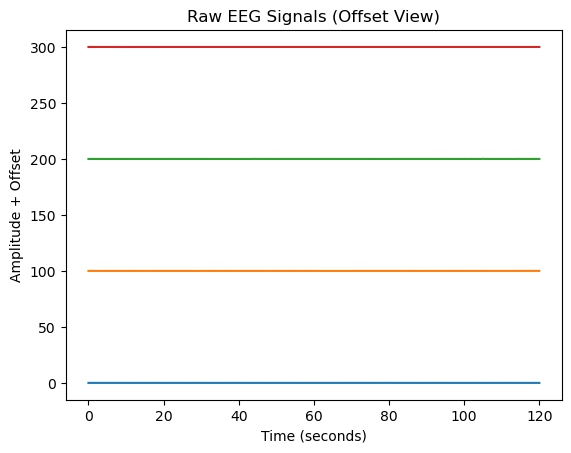

In [9]:
plt.figure()

offset = 100  # adjust depending on amplitude scale
for ch in range(4):
    plt.plot(time, eeg[:, ch] + ch * offset)

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude + Offset")
plt.title("Raw EEG Signals (Offset View)")
plt.show()


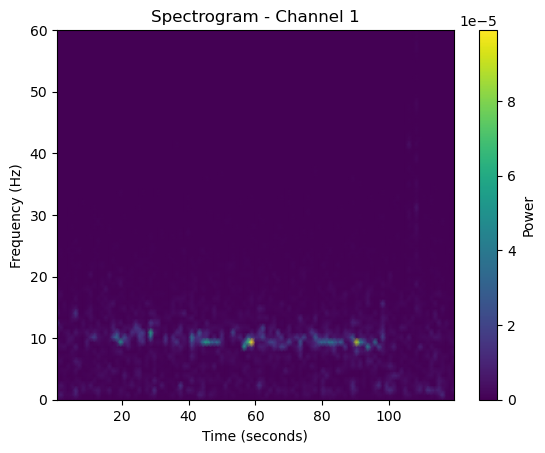

In [10]:
from scipy.signal import spectrogram

f, t, Sxx = spectrogram(eeg[:, 0], fs)

plt.figure()
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (seconds)")
plt.title("Spectrogram - Channel 1")
plt.ylim(0, 60)
plt.colorbar(label="Power")
plt.show()


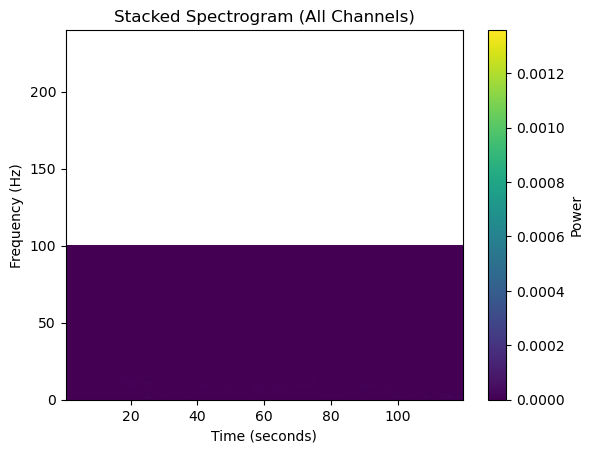

In [17]:
spectrograms = []

for ch in range(eeg.shape[1]):
    f, t, Sxx = spectrogram(eeg[:, ch], fs)
    spectrograms.append(Sxx)

# Stack along frequency axis
Sxx_stacked = np.vstack(spectrograms)

# Create new frequency axis
f_stacked = np.tile(f, eeg.shape[1])

plt.figure()
plt.pcolormesh(t, f_stacked, Sxx_stacked, shading='gouraud')
plt.ylim(0, 50)
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (seconds)")
plt.title("Stacked Spectrogram (All Channels)")
plt.ylim(0, 60 * eeg.shape[1])
plt.colorbar(label="Power")
plt.show()

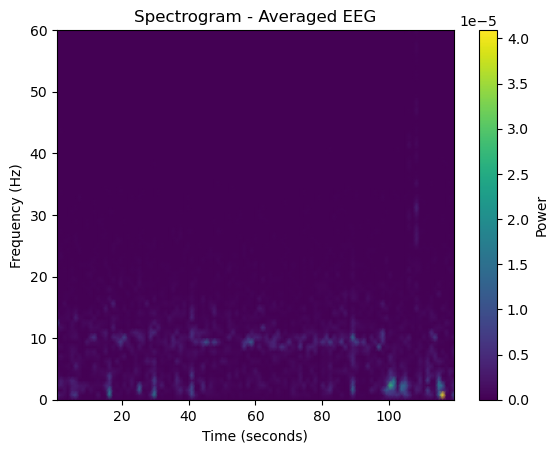

In [18]:
eeg_avg = np.mean(eeg, axis=1)

f, t, Sxx = spectrogram(eeg_avg, fs)

plt.figure()
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (seconds)")
plt.title("Spectrogram - Averaged EEG")
plt.ylim(0, 60)
plt.colorbar(label="Power")
plt.show()


In [ ]:
import librosa

# If mono:
y = eeg[:, 0]  # Use the first channel as an example
sr = fs  # Sampling rate

# Example feature:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

print(mfccs.shape)


(13, 47)


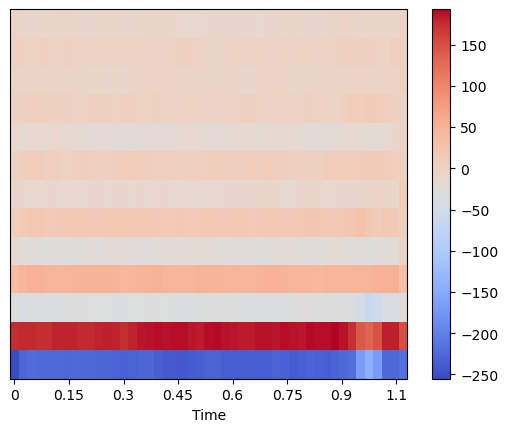

In [12]:

plt.figure()
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

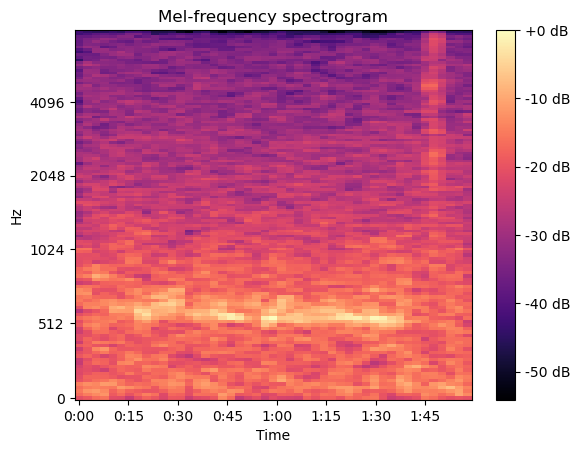

In [15]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)
# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                    fmax=50)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')